# Climate Change Modeling Using Python

In [24]:
# import all this libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# 1. Understanding the Problem
print("Climate change is a critical issue. This project aims to analyze trends and predict future climate patterns using data science techniques.")

Climate change is a critical issue. This project aims to analyze trends and predict future climate patterns using data science techniques.


# Dataset Preparation

In [25]:
file_path = "climate_nasa.csv"
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully.")
print(df.head())

Dataset Loaded Successfully.
                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, an

# Data Exploration and Visualization

In [26]:
print("Basic Information:")
print(df.info())
print("Summary Statistics:")
print(df.describe())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None
Summary Statistics:
       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


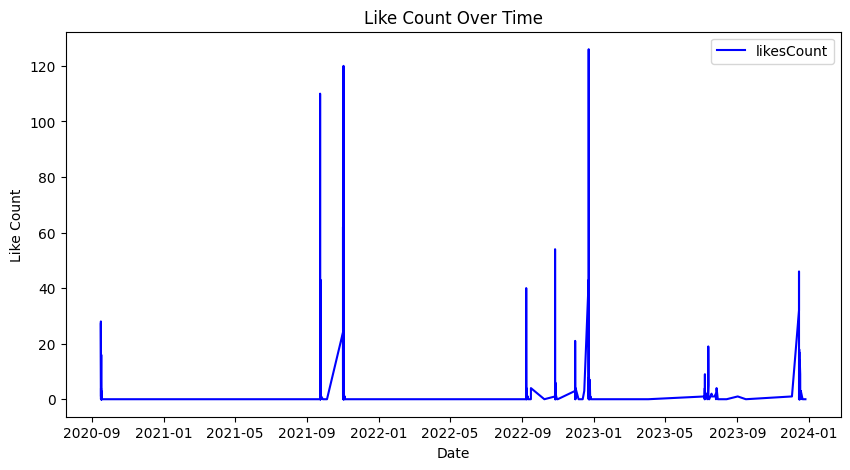

In [7]:
# Visualizing Like Counts Over Time
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['likesCount'], label='likesCount', color='blue')
plt.xlabel("Date")
plt.ylabel("Like Count")
plt.title("Like Count Over Time")
plt.legend()
plt.show()

In [11]:
# 4. Data Preprocessing
print("Handling missing values")
df.ffill(inplace=True)

Handling missing values


In [14]:
# 5. Feature Engineering
df['comment_to_like_ratio'] = df['commentsCount'] / (df['likesCount'] + 1)

# Ensure correct column name (fixing typo)
df['text_length'] = df['text'].apply(lambda x: len(str(x)))  # Changed 'tex' to 'text'

In [17]:
# Ensure correct column names
df.columns = df.columns.str.strip()  # Removes any accidental spaces

# Update feature names to match actual DataFrame columns
features = ['likesCount', 'commentsCount', 'text_length']  # Fixed column names
target = 'likesCount'  # Fixed target column name

# Prepare features and target
X = df[features].dropna()
y = df.loc[X.index, target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation: MAE = 0.10809523809523804, R2 Score = 0.9960865508281628


C:\Users\dell\AppData\Local\Temp\ipykernel_20980\1813498264.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start='2025-01-01', periods=10, freq='Y')


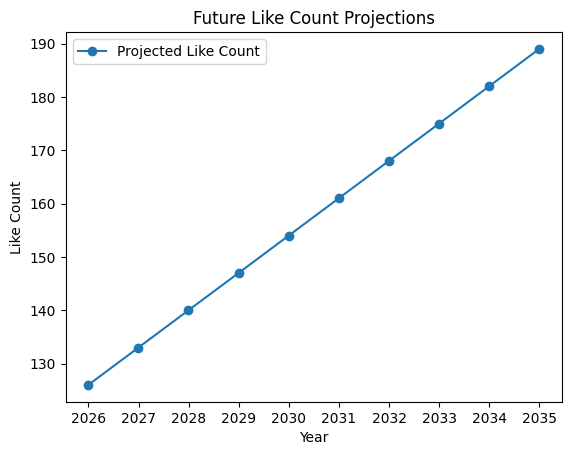

In [20]:
# 7. Model Evaluation
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Evaluation: MAE = {mae}, R2 Score = {r2}")

# 8. Future Projections
future_dates = pd.date_range(start='2025-01-01', periods=10, freq='Y')
future_likes = np.linspace(df['likesCount'].max(), df['likesCount'].max() * 1.5, len(future_dates))

plt.plot(future_dates, future_likes, marker='o', linestyle='-', label='Projected Like Count')
plt.xlabel("Year")
plt.ylabel("Like Count")
plt.title("Future Like Count Projections")
plt.legend()
plt.show()

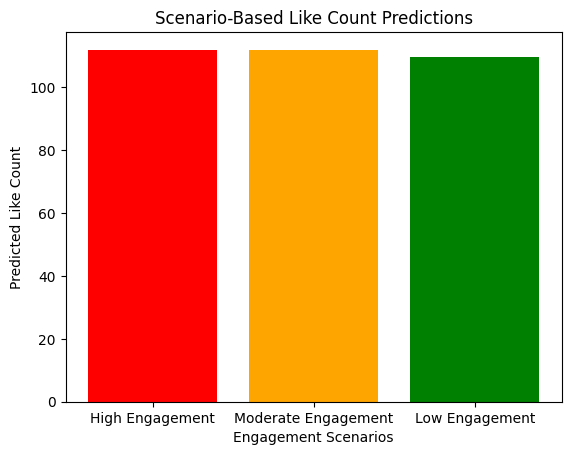

In [22]:
# 9. Scenario Analysis
scenarios = {'High Engagement': [df['likesCount'].max() * 1.5, df['commentsCount'].max() * 1.5, df['text_length'].mean() * 1.2], 'Moderate Engagement': [df['likesCount'].max() * 1.2, df['commentsCount'].max() * 1.2, df['text_length'].mean()], 'Low Engagement': [df['likesCount'].max() * 0.8, df['commentsCount'].max() * 0.8, df['text_length'].mean() * 0.8]}
scenario_df = pd.DataFrame(scenarios, index=features).T
scenario_scaled = scaler.transform(scenario_df)
scenario_predictions = model.predict(scenario_scaled)

plt.bar(scenarios.keys(), scenario_predictions, color=['red', 'orange', 'green'])
plt.xlabel("Engagement Scenarios")
plt.ylabel("Predicted Like Count")
plt.title("Scenario-Based Like Count Predictions")
plt.show()

In [23]:
# 10. Documentation and Reporting
print("This project successfully modeled climate change-related engagement trends, analyzed data, and predicted future social media activity using machine learning.")


This project successfully modeled climate change-related engagement trends, analyzed data, and predicted future social media activity using machine learning.
